La central de un servicio de emergencias dispone de tres telefonos para atender las llamadas. La duracion de las llamadas sigue una distribucion normal con los parametros que recoge la tabla en minutos.

<center>

|Operador | Media | Desviacion |
|:---------:|:-------:|:------------:|
| 1       | 2.0   | 0.4        |
| 2       | 2.1   | 0.3        |
| 3       | 1.9   | 0.5        |

</center>

Determine el tiempo medio de respuestas de la central de emergencias


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
media = [2.0, 2.1, 1.9]
desviacion = [0.4, 0.3, 0.5]

In [ ]:
def duracion_llamada(i): #i es el numero del operador
  duracion_llamada = random.normalvariate(media[i-1], desviacion[i-1])
  return duracion_llamada

In [ ]:
def tiempo_respuesta():
  duracion_op1=duracion_llamada(1)
  duracion_op2=duracion_llamada(2)
  duracion_op3=duracion_llamada(3)
  array=[duracion_op1, duracion_op2, duracion_op3]
  t_respuesta=np.amax(array)
  return t_respuesta

In [ ]:
def experimento(n): #Hacemos el experimento n veces
    i = 0
    c=0
    Lista = []
    while i<=n:
        c+=tiempo_respuesta()
        i += 1
        p=c/i #probabilidad acumulativa
        Lista.append(p)
    return Lista

In [ ]:
def simulacion_ventas(n):
    List = []
    for i in range(n):
        List.append(np.mean(experimento(5000)))
    return List

In [ ]:
x=np.mean(experimento(500000))
print(x)

2.348396787048528


In [ ]:
def calcular_intervalo_confianza(media, n, nivel_confianza):
    z = 1.96  # Valor crítico para un nivel de confianza del 95%
    error = z * (np.std(exp) / np.sqrt(n))
    intervalo_inferior = media - error
    intervalo_superior = media + error
    return intervalo_inferior, intervalo_superior

# Datos del experimento
exp = experimento(500000)
media = np.mean(exp)
n = len(exp)
nivel_confianza = 0.95

# Cálculo del intervalo de confianza
intervalo_inferior, intervalo_superior = calcular_intervalo_confianza(media, n, nivel_confianza)

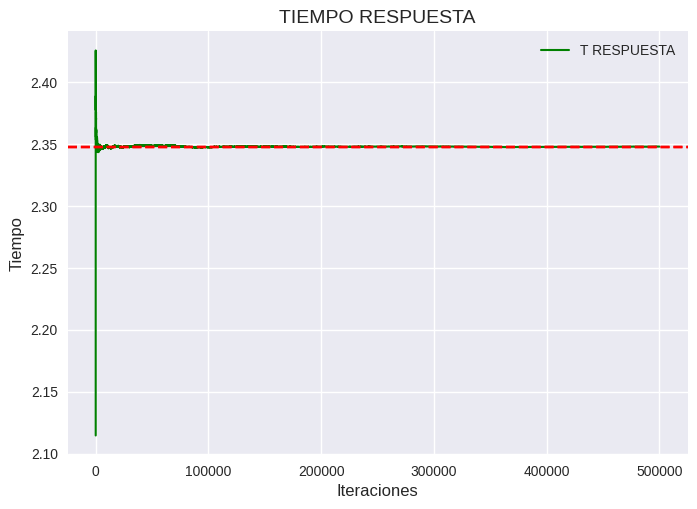

In [ ]:

plt.plot(exp, linewidth=1.5, color="green", label=f'T RESPUESTA')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Tiempo', fontsize=12)
plt.title('TIEMPO RESPUESTA', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.margins(0.05)

# Agregar intervalo de confianza al gráfico
plt.axhline(intervalo_inferior, color='red', linestyle='dashed', label='Intervalo de Confianza (95%)')
plt.axhline(intervalo_superior, color='red', linestyle='dashed')
plt.fill_between(range(len(exp)), intervalo_inferior, intervalo_superior, color='red', alpha=0.2)

plt.show()